<a href="https://colab.research.google.com/github/anjelisa01/house-price-pred/blob/main/notebook_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#installs and imports

In [1]:
!pip install -q mlflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV #(how about GridSearchCV?)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import mlflow
import mlflow.sklearn
import joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.4 MB/s eta 0:00:00


In [2]:
!pip install xgboost
from xgboost import XGBRegressor

#get data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project untuk porto/House Price Prediction/train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df=data.copy()

#Initial cleaning

In [7]:
def clean_initial_features(df, missing_thresh=0.4):
    df = df.copy()

    # Drop constant features
    nunique = df.nunique()
    constant_cols = nunique[nunique == 1].index
    df.drop(columns=constant_cols, inplace=True)

    # Drop features with too many missing values
    missing_ratio = df.isnull().mean()
    high_missing = missing_ratio[missing_ratio > missing_thresh].index
    df.drop(columns=high_missing, inplace=True)

    # Drop ID or timestamp-like columns
    id_like = [col for col in df.columns if 'id' in col.lower() or 'timestamp' in col.lower()]
    df.drop(columns=id_like, errors='ignore', inplace=True)

    return df

#Split data

In [8]:
df_clean=clean_initial_features(df)

In [9]:
#cek beda df dan df_clean
comapre=list(set(df.columns)-set(df_clean.columns))
comapre

['Fence', 'FireplaceQu', 'Alley', 'MiscFeature', 'PoolQC', 'MasVnrType', 'Id']

In [10]:
X=df_clean.drop('SalePrice',axis=1)
y=df_clean['SalePrice']

In [47]:
#Splitting tempt and test, which test is completely isolated
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

##Further splitting of temp data

Untuk keperluan model selection step

In [48]:
# Train/val/test split (no CV in model selection)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)  # 0.25 x 0.8 = 0.2

Well split yg ini karena aku ga mau nyentuh data test. apalagi masuk ke dalam cross val.

#Model selection

##Dictionary: models

In [50]:
#fair version, kurleb similiar strenght
common_params = {
    "n_estimators": 100,
    "random_state": 42
}

model_dict = {
    "SVR": SVR(C=1.0, epsilon=0.1),  # default C and epsilon
    "Ridge": Ridge(alpha=1.0, random_state=42),  # added random_state for consistency
    "Lasso": Lasso(alpha=1.0, random_state=42),  # made alpha=1.0 to match Ridge
    "RandomForest": RandomForestRegressor(**common_params),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "GradientBoost": GradientBoostingRegressor(**common_params)
}


buat function transformer so i can call it in a pipeline

##Defining features types

In [51]:
# Detect column types
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

##Defining pipelline for preprocessing

In [52]:
# Pipelines
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore",sparse_output=False))
])

In [53]:
preprocessing_pipeline=ColumnTransformer([
    ('num',num_pipeline,list(num_cols)),#diminta list nama kolom aja, dari data train akan diambil feature yang namanya tertera dilist ini
    ('cat',cat_pipeline,list(cat_cols))
])

##Function: model selection

In [54]:
def run_model_selection(model_name, model):
    mlflow.set_experiment("1_Model_Selection")

    with mlflow.start_run(run_name=model_name):

      #Pipeline training aja ga preprocess
        pipe = Pipeline([
            ('preprocessor',preprocessing_pipeline),
            ("model", model)
        ])
        #only fit to train
        pipe.fit(X_train, y_train)
        #untuk ensure the model seeing the prepreocessed version of both train and test
        #with call predict() we automatically transform val data, never fit val data.
        y_pred = pipe.predict(X_val)
        val_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        mlflow.log_params(model.get_params())
        mlflow.log_metric("val_rmse", val_rmse)
        mlflow.sklearn.log_model(pipe, "model")

        print(f"[{model_name}] Val RMSE: {val_rmse:.4f}")
        return model_name, val_rmse, pipe

##Run model selection

In [55]:
# Run all models
results = []
for name, model in model_dict.items():
    result = run_model_selection(name, model)
    results.append(result)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 7, 8, 13, 14, 15, 24, 35] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
2025/05/05 02:30:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 7, 8, 13, 14, 15, 24, 35] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[SVR] Val RMSE: 84609.4823


2025/05/05 02:30:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[Ridge] Val RMSE: 30850.5055


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.282e+09, tolerance: 5.321e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 7, 8, 13, 14, 15, 24, 35] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
2025/05/05 02:30:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[Lasso] Val RMSE: 43305.7856


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 7, 8, 13, 14, 15, 24, 35] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
2025/05/05 02:31:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[RandomForest] Val RMSE: 29314.9955


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 7, 8, 13, 14, 15, 24, 35] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
2025/05/05 02:31:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[XGBoost] Val RMSE: 29745.1608


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 7, 8, 13, 14, 15, 24, 35] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
2025/05/05 02:31:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


[GradientBoost] Val RMSE: 26116.9288


##Result

In [56]:
# Pick best model based on val_rmse
best_model_name, _, best_pipe = sorted(results, key=lambda x: x[1])[0]
print(f"\n✅ Best Model: {best_model_name}")


✅ Best Model: GradientBoost


In [57]:
# Pick best model class
best_model_class = model_dict[best_model_name].__class__

#Add engineered features

based on my experiments using all features has slighty better accuracy. so im just going to use that.

In [94]:
def feature_engineering(data):
  data = data.copy()
  #total square feet of the entire building of the house
  data['BuildingSF']=data['TotalBsmtSF']+data['GrLivArea']+data['GarageArea']+data['WoodDeckSF']+data['OpenPorchSF']+data['EnclosedPorch']+data['3SsnPorch']+ data['ScreenPorch']+data['PoolArea']

  #house bin: jenis rumah based on the age of th house
  data['HouseAge']=data['YrSold']-data['YearBuilt']
  bins=[0,10,20,50,100,float('inf')]
  labels=['New','Recent','Middle-aged','Old','Historic']

  data['HouseBin']=pd.cut(data['HouseAge'],bins=bins,labels=labels)

  #kombinasi variabel tahun jual dan tahun remodel
  #apa jarak waktu dari rumah terjual dengan kapan terakhir di remodel berpengaruh terhadap harga rumah? tentu
  data['RemodYrSold']=data['YrSold']-data['YearRemodAdd']

  #kombinasi juga quality * luas ground living
  data['QualGrLiv']=data['GrLivArea']*data['OverallQual']

  data['RatioBedroom'] = data['BedroomAbvGr'] / data['TotRmsAbvGrd'].replace(0, np.nan)

  #rasio jumlah kamar tidur above ground dibanding dengan total jumlah ruangan
  # data['RatioBedroom']=data['BedroomAbvGr']/data['TotRmsAbvGrd']
  data['RatioBedroom'] = data['BedroomAbvGr'] / data['TotRmsAbvGrd'].replace(0, np.nan)

  #kombi juga tapi sebagai kategori: tipe rumah berdasarkan neigborhood dan style rumahnya
  data['Neighborhood_HouseStyle']=data['Neighborhood']+'_'+data['HouseStyle']

  #akan return data+7 column
  return data.copy()

In [95]:
X_train_e=feature_engineering(X_train)
X_val_e=feature_engineering(X_val)

In [96]:
# Now redefine numerical and categorical feature lists
numerical_features = X_train_e.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_e.select_dtypes(include=['object', 'category']).columns.tolist()

In [97]:
print("Train columns after feature engineering:", X_train_e.columns)
print("Columns used in preprocessing pipeline:", numerical_features + categorical_features)


Train columns after feature engineering: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDe

In [98]:
preprocessing_pipeline_engineered=ColumnTransformer([
    ('num',num_pipeline,numerical_features),#diminta list nama kolom aja, dari data train akan diambil feature yang namanya tertera dilist ini
    ('cat',cat_pipeline,categorical_features)
])

#Hyperparameter tuning and cross val

hyperparameter tuning dan cross validatin juga sebagai langkah akhir otpimisasi model dan evaluasi model

random search

In [99]:
def hyperparameter_tuning_cv(X_train, y_train, X_test, y_test, preprocessing_pipeline):

    # Define pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessing_pipeline),
        ('model', GradientBoostingRegressor(random_state=42))
    ])

    # Define hyperparameter search space
    param_dist = {
      'model__n_estimators': [100, 200, 300, 500],
      'model__learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1],
      'model__max_depth': [3, 4, 5, 6, 7],
      'model__subsample': [0.5, 0.7, 0.8, 0.9, 1.0],
      'model__min_samples_split': [2, 5, 10, 20],
      'model__min_samples_leaf': [1, 2, 4, 10],
      "model__max_features": ["sqrt", "log2", None, 0.3, 0.5],
      # 'model__max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, None],
      }


    search = RandomizedSearchCV(
      estimator=pipe,
      param_distributions=param_dist,
      n_iter=50,                           # Increased
      scoring='neg_mean_squared_error',
      cv=5,
      random_state=42,
      n_jobs=-1,
      verbose=1,
      refit=True,
      return_train_score=True,
      error_score='raise'
  )


    # Track with MLflow
    with mlflow.start_run(run_name="Pipeline-GradientBoosting-RandomSearch"):
        search.fit(X_train, y_train)
        best_model = search.best_estimator_

        # Evaluate on test/validation data
        y_pred = best_model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # Log to MLflow
        for param, value in search.best_params_.items():
            mlflow.log_param(param, value)
        mlflow.log_metric("rmse", rmse)
        mlflow.sklearn.log_model(best_model, artifact_path="pipeline_model")

        print(f"Best Parameters: {search.best_params_}")
        print(f"Test RMSE: {rmse:.4f}")

        return best_model, search.best_params_, rmse



In [100]:
# without
best_model, best_params, best_rmse=hyperparameter_tuning_cv(X_train, y_train, X_val, y_val, preprocessing_pipeline)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 7, 8, 13, 14, 15, 24, 35] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
2025/05/05 03:16:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Parameters: {'model__subsample': 0.9, 'model__n_estimators': 500, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 4, 'model__learning_rate': 0.05}
Test RMSE: 25690.7642


In [101]:
# with
best_model2, best_params2, best_rmse2=hyperparameter_tuning_cv(X_train_e, y_train, X_val_e, y_val, preprocessing_pipeline_engineered)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4, 7, 8, 13, 14, 15, 24, 35, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
2025/05/05 03:21:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Best Parameters: {'model__subsample': 1.0, 'model__n_estimators': 500, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_features': 0.3, 'model__max_depth': 6, 'model__learning_rate': 0.1}
Test RMSE: 24586.9381


**best_model2 is the winner** , the one with feature engineering.

In [102]:
best_model2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', ...])])),
                ('model',
                 GradientBoostingRegressor(max_depth=6, max_features=0.3,
                                           min_samples_split=10,
                                           n_estimators=500,
                                           random_state=42))])

#predict to X_test

In [104]:
X_test_e=feature_engineering(X_test)

In [106]:
predict=best_model2.predict(X_test_e)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7, 13, 14, 27, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [107]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

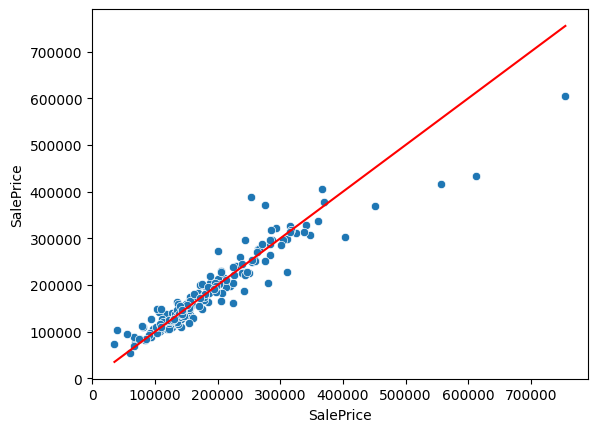

In [108]:
plt.figure()
sns.scatterplot(x=y_test,y=predict)
sns.lineplot(x=y_test,y=y_test,color='red')
plt.show()

In [109]:
rmse=np.sqrt(mean_squared_error(y_test,predict))
mae=mean_absolute_error(y_test,predict)
r2=r2_score(y_test,predict)
print(rmse,mae,r2)

30047.74942448407 16864.687807001097 0.8887898231104623


##Saving this model

In [110]:
import joblib
joblib.dump(best_model2,'the_model.joblib')

['the_model.joblib']

##Test using this model

In [111]:
model=joblib.load('the_model.joblib')

In [113]:
test=feature_engineering(X_train)
model.predict(test.iloc[:3])

array([143657.32103623, 169888.79187164, 125733.02103024])

In [ ]:
y_train.iloc[:3]

,SalePrice
907,250000
782,187100
952,133900


#Use model for test dataset.

In [115]:
import pandas as pd
import numpy as np
predict_this=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project untuk porto/House Price Prediction/test.csv')
predict_this.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [116]:
testcsv_prediction=model.predict(feature_engineering(predict_this))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7, 8, 14, 15, 35, 38] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [117]:
testcsv_prediction

array([133340.39268284, 159246.17261718, 180727.40727038, ...,
       158673.15631292, 124735.89396421, 214423.52365444])

In [118]:
final=pd.DataFrame(testcsv_prediction,columns=['SalePrice'],index=predict_this['Id'])
final

,SalePrice
Id,
1461,133340.392683
1462,159246.172617
1463,180727.407270
1464,197713.745563
1465,177263.188540
...,...
2915,85244.704633
2916,89076.388047
2917,158673.156313


In [119]:
final.shape

(1459, 1)

In [120]:
#export
final.to_csv('2nd iteration HousePrice prediction.csv')

#Result kaggle competition (IMPROVEMENT)

leaderboard: 1735
score: 0.13541



move 600 up in the leaderboard from 2300 👍

improvement from  score 0.14757, rangking 2300 dari 4200 partisipan

definetely can be improve